In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium 

pd.set_option('display.max_columns', 100)

# Overview

- Data về housing prices tại các district trong California
- Mỗi row trong dataset không phải giá 1 căn nhà mà là giá nhà median của một khu vực
- Observational units là district (not individual house)
- Đơn vị xem xét là 1 khu vực
- Real estate agent
- Xem xét với tư cách là một nhân viên bất động sản -> Dự đoán tiềm năng của khu vực thông qua dự đoán giá nhà
- Regression (*)
- Bài toán Hồi quy

# Prediction (predive modeling)
## Khi giải quyết một bài toán dự đoán, có 2 loại:
- Regression: outcome -> numeric + continuous: income (hoi quy)
- Đầu ra là một biến numeric hay continuous -> bài toán hồi quy
- Classification: outcome -> categories
    - Bad debt: good/bad(0/1) - Binary classification
    - Churn prediction: telco, subcription
    - Multiclass: predict professional (not common)
- Đầu ra là một biến category hay discrete (few distinct value)

# Load and quick view data

In [4]:
# Load
df = pd.read_csv("housing.csv")

In [5]:
# Shape
df.shape

(20640, 10)

In [6]:
# 20k khu vực. 10 features

In [7]:
# First rows
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


### Terms
 - `median_house_value` : outcome
 - Other columns : features/attributes
 - Feature engineering: design features

In [8]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
# Missing values
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

# Investigate categorical columns

In [10]:
df["ocean_proximity"].value_counts(normalize=True) * 100

<1H OCEAN     44.263566
INLAND        31.739341
NEAR OCEAN    12.877907
NEAR BAY      11.094961
ISLAND         0.024225
Name: ocean_proximity, dtype: float64

In [11]:
# View categorical cols
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

# Exploratory Data Analysis (EDA)

## Investigate numeric variables
- Histogram / KDEs
- Boxplot

## Histograms of numeric variables

In [12]:
df_num = df.select_dtypes("number").copy()
df_num.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


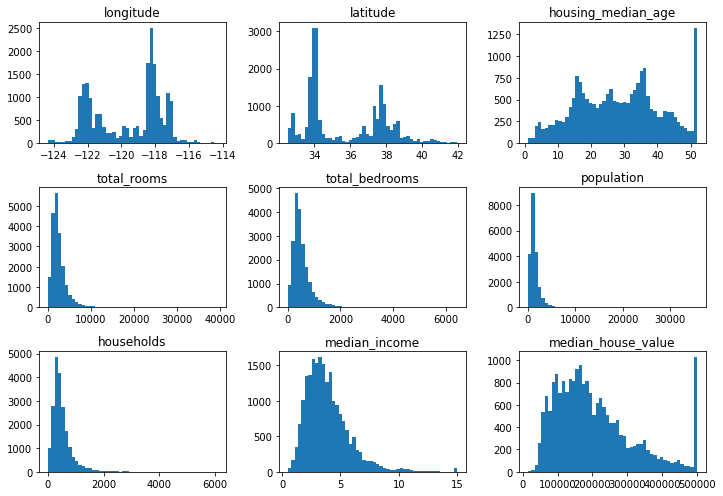

In [13]:
fig = plt.figure(figsize=(10,7))
ncols = 3
nrows = np.ceil(df_num.shape[1] / ncols)

for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    df_num[c].plot.hist(bins = 50, ax = ax)

    #Decorate
    ax.set_title(c)
    ax.set_ylabel(None)
    
plt.tight_layout()
plt.show()

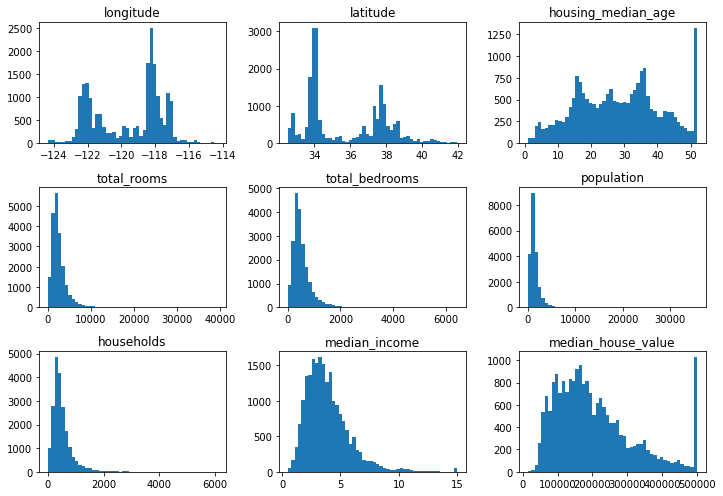

In [14]:
# Figure
fig = plt.figure(figsize=(10, 7))

# Define grid
ncols = 3
nrows = np.ceil(df_num.shape[1] / ncols)

# Add subplots
for i, c in enumerate(df_num.columns):
    ax = fig.add_subplot(nrows, ncols, i + 1)
    
    # Plot
    df_num[c].plot.hist(bins=50, ax=ax)
    
    # Decorate
    ax.set_title(c)
    ax.set_ylabel(None)

# Other
plt.tight_layout()
plt.show()

**Comments**:

- `housing_median_age`, `median_house_value` có vẻ bị capped ở bên phải (peak at the end)


## Plot satter plots

### Ver 1

In [15]:
# define the world map centered around Canada with a low zoom level
world_map = folium.Map(location=[36.778259, -119.417931], zoom_start=6)

# display world map
world_map

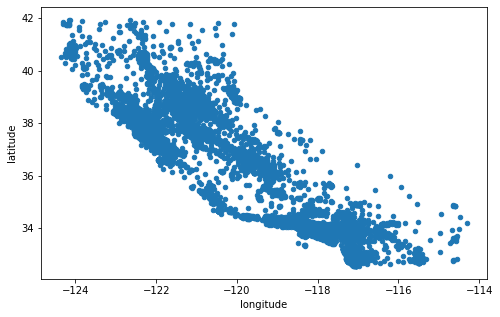

In [16]:
# Figure, ax
fig, ax = plt.subplots(figsize=(8, 5))
df.plot.scatter(x="longitude", y="latitude", ax=ax)
# Show
plt.show()

Scatter plot customization:

- Point shape, size, color, opacity
- Line linestyle, linewidth, color, opacity

### Ver 2
- Set alpha để giảm density

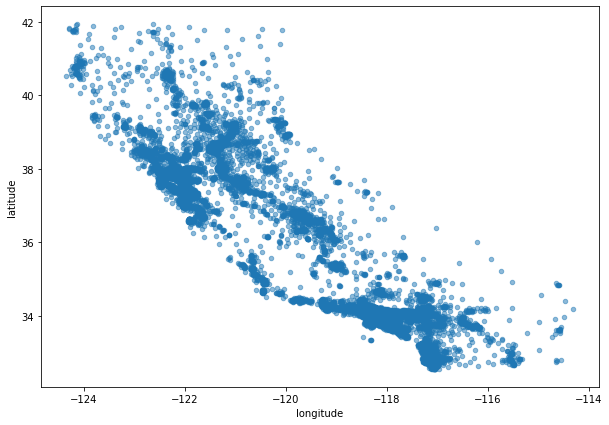

In [17]:
fig, ax = plt.subplots(figsize=(10, 7))
df.plot.scatter(x="longitude", y="latitude", alpha=.5, ax=ax)
plt.show()

### Ver 3
- Thể hiện population qua size

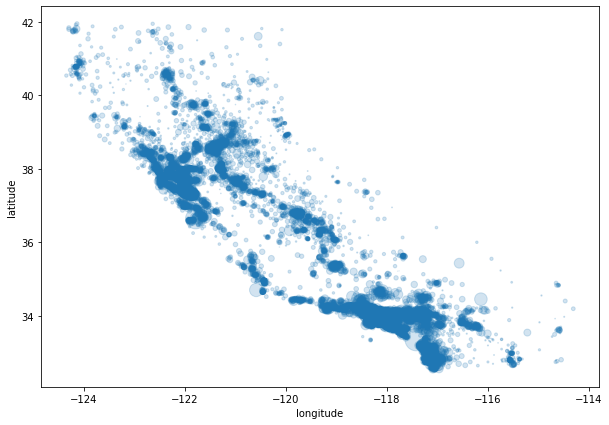

In [18]:
fig, ax = plt.subplots(figsize=(10, 7))

df.plot.scatter(
    x="longitude", 
    y="latitude", 
    alpha=.2, 
    s=df["population"]/70,
    ax=ax
)

plt.show()

### Ver 4
- Thêm màu sắc thể hiện housing prices

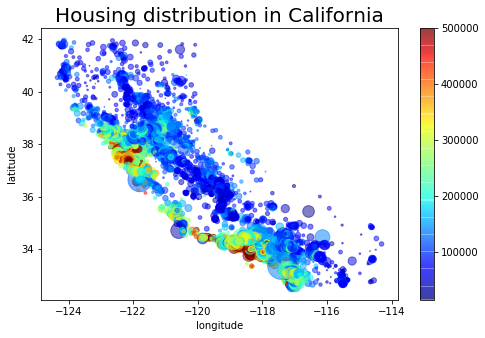

In [19]:
fig, ax = plt.subplots(figsize=(8, 5))

df.plot.scatter(
    x="longitude", y="latitude", 
    alpha=.5, 
    s=df["population"] / 50, 
    c=df['median_house_value'],
    cmap=plt.get_cmap("jet"),
    ax=ax
)

ax.set_title("Housing distribution in California", fontsize=20)

plt.show()

**Remarks**:

- Giá nhà có liên quan chặt chẽ vị trí gần biển hay không (trừ khu vực phía Bắc California - possible reason: cold weather)
    - Đông dân có xu hướng giá cao hơn
    - Gần biển có xu hướng giá cao hơn

## Scatter plots of other variables with house values

In [20]:
cols = [
    "housing_median_age", "total_rooms", 
    "total_bedrooms", "median_income", "median_house_value"
]

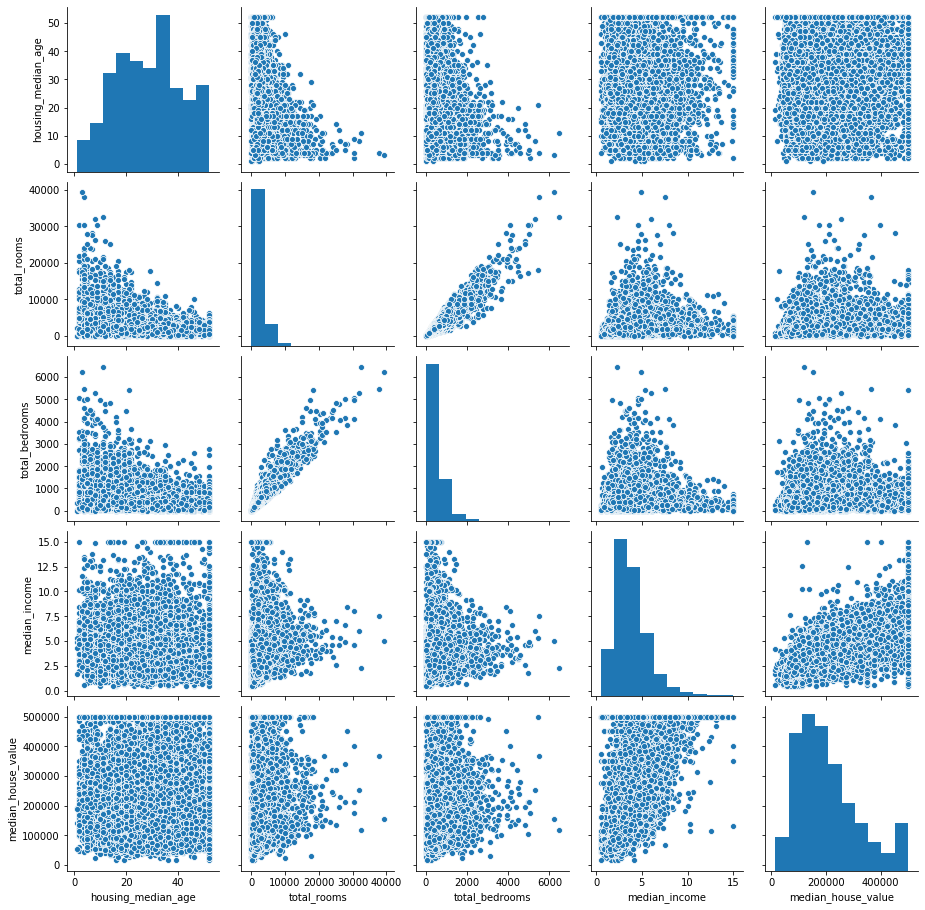

In [21]:
sns.pairplot(df[cols])
plt.show()

**Remarks**

- `median_income`, `totla_rooms`, `total_bedroms` seems to be good predictors for housing prices
- `total_rooms` and `total_bedrooms` are strongly correlated -> combine them?


## Zoom in median_income vs median_house_value

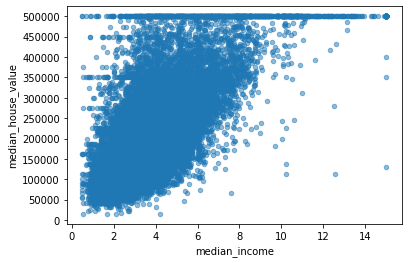

In [22]:
fig, ax = plt.subplots()

df.plot.scatter(x="median_income", y="median_house_value", alpha=.5, ax=ax)

# Decoration
max_price = df["median_house_value"].max()
yticks = np.arange(0, max_price, 50000)
ax.set_yticks(yticks)

plt.show()

**Remarks**:
- Data seem to be capped at 500000
- Solution: 
    - Remove those points
    - Or research and obtain the accurate price

## Correlation

In [23]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [24]:
df.corr()["median_house_value"]

longitude            -0.045967
latitude             -0.144160
housing_median_age    0.105623
total_rooms           0.134153
total_bedrooms        0.049686
population           -0.024650
households            0.065843
median_income         0.688075
median_house_value    1.000000
Name: median_house_value, dtype: float64

In [25]:
df.corr()["median_house_value"].abs().sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

In [26]:
# Inference != Prediction

## Derive features

1. rooms per household
2. bedrooms per room
3. population per household

In [27]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]
df["population_per_household"] = df["population"] / df["households"]

In [28]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


Review correlation

In [29]:
df.corr()["median_house_value"].abs().sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
bedrooms_per_room           0.255880
rooms_per_household         0.151948
latitude                    0.144160
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
longitude                   0.045967
population                  0.024650
population_per_household    0.023737
Name: median_house_value, dtype: float64

**Remarks**:
- `rooms_per_household` and `bedrooms_per_room` have better correlation with `median_house_value` than `total_rooms` and `total_bedrooms`

## Investigate null data

In [30]:
null_data = df.loc[df["total_bedrooms"].isnull() == True, :].copy()

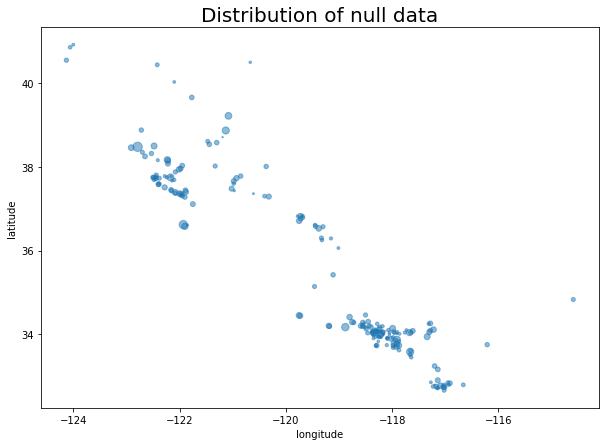

In [31]:
fig, ax = plt.subplots(figsize=(10, 7))

null_data.plot.scatter(
    x="longitude", y="latitude", 
    alpha=.5, #opacity
    s=df["population"] / 50, #size 
    ax=ax
)

ax.set_title("Distribution of null data", fontsize=20)

plt.show()

**Remarks**:

- No clear patterns

# Preprocess data to train the model

In [32]:
from sklearn.model_selection import train_test_split

## Remove NA

- Other consideration: imputation with median values

In [33]:
# Drop NA
df.dropna(how="any", inplace=True)

In [34]:
# Check
df.isnull().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64

## One hot encoding `ocean_proximity`

In [35]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: ocean_proximity, dtype: int64

In [36]:
pd.get_dummies(df["ocean_proximity"], drop_first=True)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
20635,1,0,0,0
20636,1,0,0,0
20637,1,0,0,0
20638,1,0,0,0


In [37]:
ocean_data = pd.get_dummies(df["ocean_proximity"], drop_first=True)
ocean_data.head(2)

,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,1,0
1,0,0,1,0


In [38]:
# Combine with the original data
df = df.join(ocean_data)
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,0,0,1,0


In [39]:
# Remove column ocean_proximity
df.drop(columns=["ocean_proximity"], inplace=True)
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,0,0,1,0


In [42]:
# Double check
df.dtypes

longitude                   float64
latitude                    float64
housing_median_age          float64
total_rooms                 float64
total_bedrooms              float64
population                  float64
households                  float64
median_income               float64
median_house_value          float64
rooms_per_household         float64
bedrooms_per_room           float64
population_per_household    float64
INLAND                        uint8
ISLAND                        uint8
NEAR BAY                      uint8
NEAR OCEAN                    uint8
dtype: object

In [43]:
# Make sure there is no non-numeric columns
df.select_dtypes("O").columns.tolist()

[]

## Split train test

In [51]:
# Get features
# Exclude label
X = df.drop(columns=["median_house_value"])

In [52]:
# Get labels
y = df["median_house_value"]

In [53]:
# Preview X
X.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,0,0,1,0


In [54]:
# Preview y
y.head(3)

0    452600.0
1    358500.0
2    352100.0
Name: median_house_value, dtype: float64

### Split train, test

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=.25, 
    random_state=1
)

In [57]:
# Double check size
print(X_train.shape)
print(X_test.shape)

(15324, 15)
(5109, 15)


# Train model

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
# Initiate model
model_1 = LinearRegression()

In [60]:
# Train (fit data to the model to learn the parameters)
model_1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### View the trained models

In [61]:
# Coefficients
model_1.coef_

array([-2.81366749e+04, -2.66744945e+04,  1.08013950e+03,  1.31670628e+00,
        1.53942179e+01, -3.87207335e+01,  1.03943834e+02,  4.09908119e+04,
        3.49849195e+03,  2.72566949e+05,  4.72397993e+01, -3.42935300e+04,
        1.38297215e+05, -3.07716603e+03,  4.49891289e+03])

In [62]:
# Columns
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'rooms_per_household', 'bedrooms_per_room', 'population_per_household',
       'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='object')

### Make predictions using the trained model

In [63]:
# Predict
y_pred_1 = model_1.predict(X_test)

In [64]:
# Preview first few predictions
y_pred_1[:5].tolist()

[382829.12476011366,
 275008.698785231,
 154075.76898951223,
 358141.7821092596,
 53024.652698590886]

In [65]:
# Compare with actual label
y_test[:5].tolist()

[360900.0, 291500.0, 131300.0, 500001.0, 118800.0]

## Evaluate the model

### Model 0: AVG price
- Our best guess without building any model is the average price

#### RMSE

$$
\sqrt{\frac{1}{n} \Sigma((y_i - \hat{y_i})^2})
$$

#### Calculate manually

In [66]:
# AVG model RMSE
y_pred_0 = np.full(y_test.shape, y_train.mean())
residuals_0 = y_test - y_pred_0

In [67]:
from sklearn.metrics import mean_squared_error

In [68]:
np.sqrt(mean_squared_error(y_test, y_pred_0))

117054.03869773263

#### Calculate using sklearn

In [69]:
# For model 0
np.sqrt(mean_squared_error(y_test, y_pred_0))

117054.03869773263

In [70]:
# Residuals
print(residuals_0.abs().mean())
print(residuals_0.abs().std())

92090.95961121324
72262.88976047133


### Model 1: Linear Reg

In [71]:
# RMSE
np.sqrt(mean_squared_error(y_test, y_pred_1))

67819.2823557787

- Better than model 0

In [72]:
# Residuals
y_pred_1 = model_1.predict(X_test)
residuals_1 = y_test - y_pred_1

In [73]:
# Residuals
print(residuals_1.abs().mean())
print(residuals_1.abs().std())

48932.68832184276
46962.52503718679


### Plots

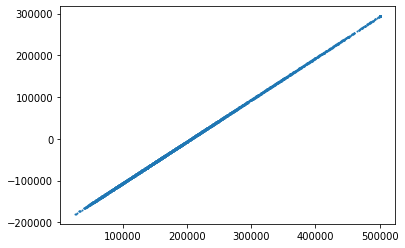

In [74]:
# Model 0
fig, ax = plt.subplots()
ax.scatter(y_test, residuals_0, s=1)
plt.show()

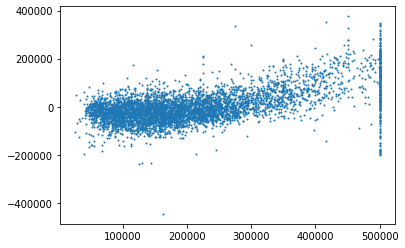

In [75]:
# Model 1
fig, ax = plt.subplots()
ax.scatter(y_test, residuals_1, s=1)
plt.show()

# Try another model

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
# Train
model_2 = RandomForestRegressor(n_estimators=100)
model_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [87]:
model_2.predict(X_test)

array([475746.55, 336881.04, 160123.  , ..., 215004.  , 270591.08,
       132439.  ])

In [88]:
# Predict
y_pred_2 = model_2.predict(X_test)

In [89]:
y_pred_2[:5]

array([475746.55, 336881.04, 160123.  , 388565.27,  90020.  ])

In [90]:
residuals_2 = y_test - y_pred_2

In [92]:
# Model 2 RMSE
np.sqrt(mean_squared_error(y_test, y_pred_2))

50133.392203092066

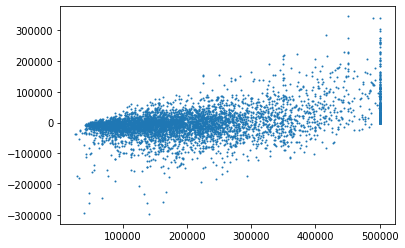

In [94]:
# Residuals
fig, ax = plt.subplots()
ax.scatter(y_test, residuals_2, s=1)
plt.show()

## Các việc đã thực hiện:
- Load, inspect data
- EDA
- Clean, preprocess before model building
- Modeling:
    - Select model: LinearRegression, RF,..
    - Split train/test
    - Fit data
    - Make prediction
- Evaluate model
    - RMSE